In [53]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [55]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [2 6 4 6 5 2 1 4 6 1]


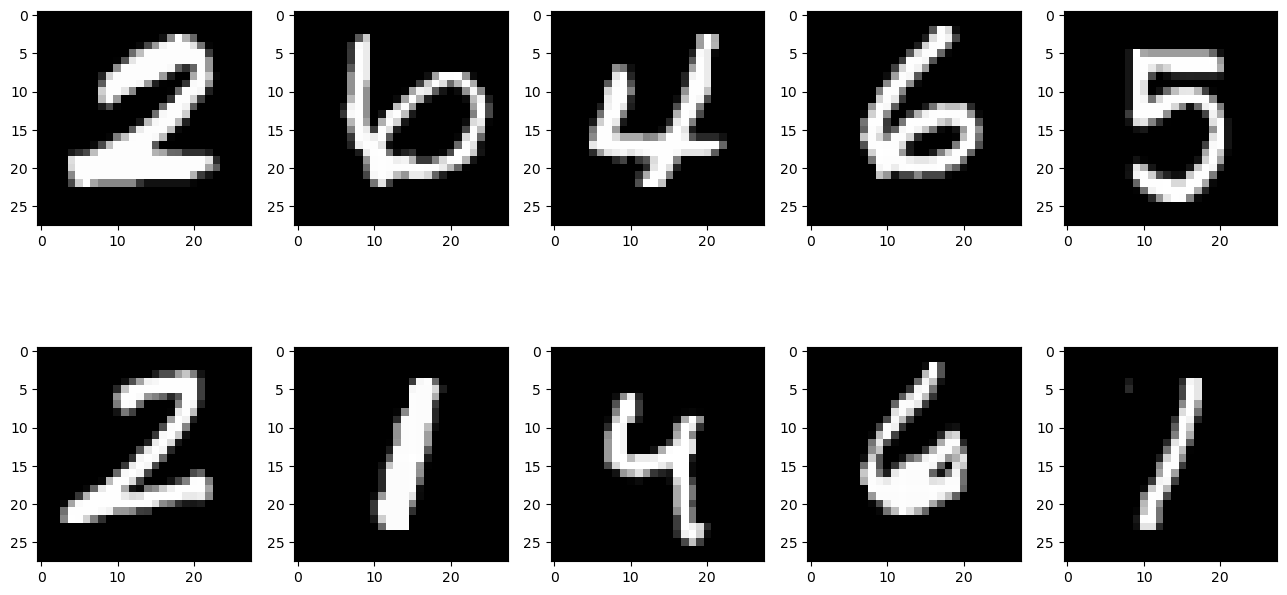

In [57]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [59]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [61]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [65]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9366 - loss: 0.2100
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0888
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9796 - loss: 0.0652
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9845 - loss: 0.0498
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9873 - loss: 0.0399
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9889 - loss: 0.0346
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9908 - loss: 0.0285
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9921 - loss: 0.0248
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0229
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0209
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0190
Epoch 12/20
1875/1875 ━━━━━━━━

Plot the loss and accuracy graphs

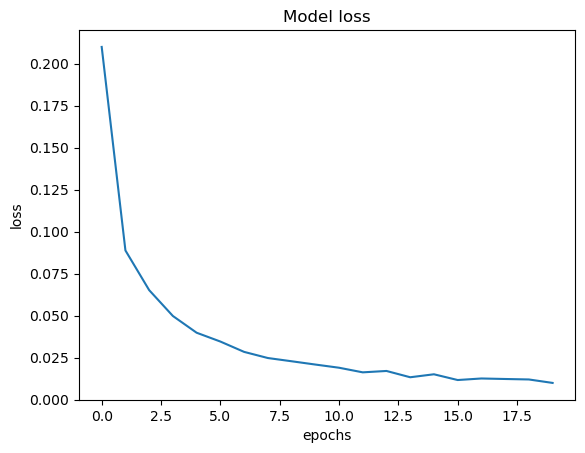

In [67]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

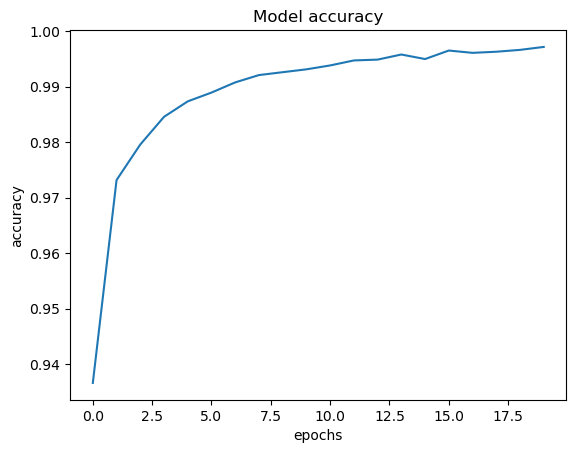

In [69]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [71]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9837 - loss: 0.0941
Loss of the Test dataset is: 0.09412846714258194
Accuracy of the test dataset is: 0.9836999773979187


Save the model weights

In [73]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [2]:
conda activate myenv


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda init

no change     /opt/anaconda3/condabin/conda
no change     /opt/anaconda3/bin/conda
no change     /opt/anaconda3/bin/conda-env
no change     /opt/anaconda3/bin/activate
no change     /opt/anaconda3/bin/deactivate
no change     /opt/anaconda3/etc/profile.d/conda.sh
no change     /opt/anaconda3/etc/fish/conf.d/conda.fish
no change     /opt/anaconda3/shell/condabin/Conda.psm1
modified      /opt/anaconda3/shell/condabin/conda-hook.ps1
no change     /opt/anaconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /opt/anaconda3/etc/profile.d/conda.csh
no change     /Users/tharushisewwandi/.bash_profile

==> For changes to take effect, close and re-open your current shell. <==


Note: you may need to restart the kernel to use updated packages.


In [6]:
conda activate myenv


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [47]:
from tensorflow.keras import regularizers

In [49]:
regularizers.l1_l2(l1=0.0001, l2=0.0001)

In [51]:
# L2 example
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)))

# L1 example
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l1(0.001)))

# L1 + L2 together
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


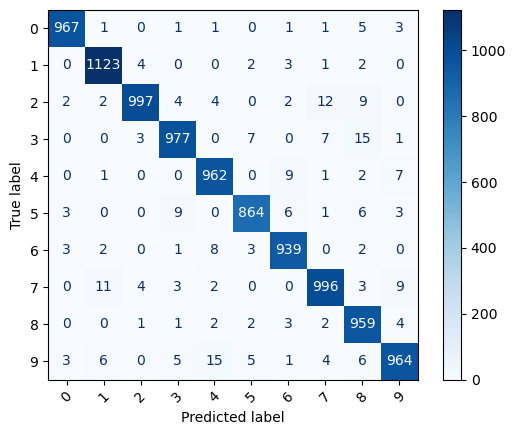

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes
y_pred_probs = model.predict(new_test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(new_test_target, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()
